In [168]:
import optuna
print(optuna.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3.0.0


# 多目的最適化 TPESamplerを試す

In [169]:
def obj1(x1,x2):
    return (x1-1.)**2 + (x2-1.)**2

def obj2(x1,x2):
    return (x1+x2-10)**2

obj1とobj2を可視化する.

In [170]:
X1,X2 = np.meshgrid(np.linspace(0,10,10), np.linspace(0,10,10))

<a list of 10 text.Text objects>

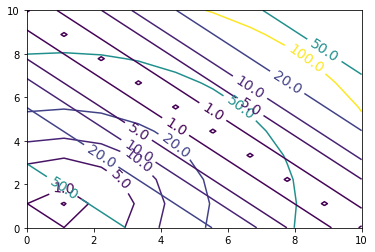

In [171]:
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100])
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100])
cont2.clabel(fmt='%1.1f', fontsize=14)

In [172]:
def objective(trial):
    x1 = trial.suggest_uniform("x1", 0, 10) # 変数xを上下限0~5の範囲で連続値
    x2 = trial.suggest_uniform("x2", 0, 10) # 変数yを上下限0~3の範囲で連続値
    return obj1(x1,x2), obj2(x1,x2)

In [173]:
study_nsga2 = optuna.create_study(directions=["minimize", "minimize"], sampler=optuna.samplers.NSGAIISampler())
study_nsga2.optimize(objective, n_trials=200)
study_tpe = optuna.create_study(directions=["minimize", "minimize"], sampler=optuna.samplers.TPESampler())
study_tpe.optimize(objective, n_trials=200)

[I 2022-08-30 16:35:29,800] A new study created in memory with name: no-name-901b54fa-4a1f-4a11-b93b-013861237bf7
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-08-30 16:35:29,805] Trial 0 finished with values: [20.154359603442995, 3.330805561303425] and parameters: {'x1': 4.825497138292545, 'x2': 3.3494533935276403}. 
[I 2022-08-30 16:35:29,806] Trial 1 finished with values: [93.95076598960907, 31.586935747453918] and parameters: {'x1': 7.036972011988805, 'x2': 8.583253583790595}. 
[I 2022-08-30 16:35:29,808] Trial 2 finished with values: [99.58004623270466, 34.050085163473256] and parameters: {'x1': 6.526032982575638, 'x2': 9.309

In [174]:
from optuna.study._multi_objective import _get_pareto_front_trials

In [175]:
pareto_trials_tpe = _get_pareto_front_trials(study_tpe)
pareto_trials_nsga2 = _get_pareto_front_trials(study_nsga2)

In [176]:
# pareto frontを取り出す.
pareto_list_nsga2 = []
for trial in pareto_trials_nsga2:
    pareto_list_nsga2.append({'params': trial.params, 'values': trial.values, 'trial_number': trial.number})

xs_pareto_nsga2 = []
vals_pareto_nsga2 = []
for lis in pareto_list_nsga2:
    xs_pareto_nsga2.append(lis['params'])
    vals_pareto_nsga2.append(lis['values'])
xs_pareto_nsga2 = pd.DataFrame(xs_pareto_nsga2)
vals_pareto_nsga2 = pd.DataFrame(vals_pareto_nsga2)


pareto_list_tpe = []
for trial in pareto_trials_tpe:
    pareto_list_tpe.append({'params': trial.params, 'values': trial.values, 'trial_number': trial.number})

xs_pareto_tpe = []
vals_pareto_tpe = []
for lis in pareto_list_tpe:
    xs_pareto_tpe.append(lis['params'])
    vals_pareto_tpe.append(lis['values'])
xs_pareto_tpe = pd.DataFrame(xs_pareto_tpe)
vals_pareto_tpe = pd.DataFrame(vals_pareto_tpe)

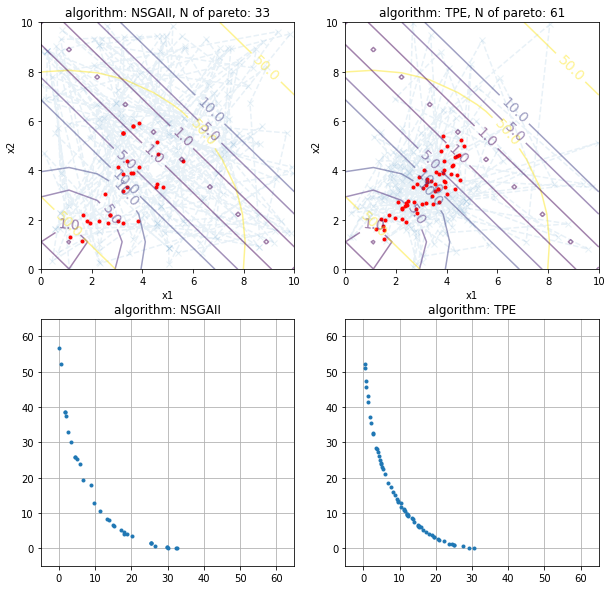

In [177]:
fig = plt.figure(figsize=[10,10])
# NSGAIIのx1,x2空間plot
ax = fig.add_subplot(221)
ax.set_title(f'algorithm: NSGAII, N of pareto: {len(xs_pareto_nsga2)}')
ax.plot(study_nsga2.trials_dataframe()['params_x1'], study_nsga2.trials_dataframe()['params_x2'],'x--', alpha=0.1)
ax.plot(xs_pareto_nsga2['x1'], xs_pareto_nsga2['x2'], '.', color='red')

cont1 = ax.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 50], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = ax.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 50], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# TPEのx1,x2空間plot
ax = fig.add_subplot(222)
ax.set_title(f'algorithm: TPE, N of pareto: {len(xs_pareto_tpe)}')
ax.plot(study_tpe.trials_dataframe()['params_x1'], study_tpe.trials_dataframe()['params_x2'],'x--', alpha=0.1)
ax.plot(xs_pareto_tpe['x1'], xs_pareto_tpe['x2'], '.', color='red')

cont1 = ax.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 50], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = ax.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 50], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# NSGAIIのobjective functions 空間plot
ax = fig.add_subplot(223)
ax.set_title(f'algorithm: NSGAII')
ax.plot(vals_pareto_nsga2[0], vals_pareto_nsga2[1], '.')
ax.set_xlim(-5,65)
ax.set_ylim(-5,65)
ax.grid()

ax = fig.add_subplot(224)
ax.set_title(f'algorithm: TPE')
ax.plot(vals_pareto_tpe[0], vals_pareto_tpe[1], '.')
ax.set_xlim(-5,65)
ax.set_ylim(-5,65)
ax.grid()

TPEの方が計算速度は劣るが、Pareto Front探索能力は上.

## 重要度分析周りのtest

In [178]:
import optuna.importance
import optuna.integration

In [179]:
fANOVA = optuna.importance.FanovaImportanceEvaluator()

In [180]:
print(fANOVA.evaluate(study_tpe, target=lambda t: t.values[0]))
print(fANOVA.evaluate(study_nsga2, target=lambda t: t.values[0]))

OrderedDict([('x2', 0.547092981450825), ('x1', 0.4529070185491749)])
OrderedDict([('x2', 0.5005870885652097), ('x1', 0.4994129114347903)])


In [181]:
shap = optuna.integration.ShapleyImportanceEvaluator()

ShapleyImportanceEvaluator is experimental (supported from v3.0.0). The interface can change in the future.


In [182]:
print(shap.evaluate(study_tpe, target=lambda t: t.values[0]))
print(shap.evaluate(study_nsga2, target=lambda t: t.values[0]))

OrderedDict([('x1', 8.012005084340547), ('x2', 7.941595816298536)])
OrderedDict([('x2', 19.431780229970837), ('x1', 17.241241960801247)])


# 制約付き最適化を試す

In [183]:
def obj1(x1,x2):
    return (x1-1.)**2 + (x2-1.)**2

def obj2(x1,x2):
    return np.abs(x1+x2-10)

def constraints(trial):
    return trial.user_attrs['constraint']

def objective(trial):
    x1 = trial.suggest_uniform("x1", 0, 10) # 変数xを上下限0~5の範囲で連続値
    x2 = trial.suggest_uniform("x2", 0, 10) # 変数yを上下限0~3の範囲で連続値
    trial.set_user_attr('constraint', (obj2(x1,x2),))

    return obj1(x1,x2)

In [184]:
X1,X2 = np.meshgrid(np.linspace(0,10,10), np.linspace(0,10,10))

<a list of 4 text.Text objects>

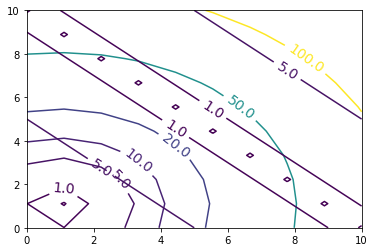

In [185]:
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100])
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100])
cont2.clabel(fmt='%1.1f', fontsize=14)

In [186]:
study_cons = optuna.create_study(directions=["minimize"], sampler=optuna.samplers.TPESampler(constraints_func=constraints))
study_cons.optimize(objective, n_trials=300)

The ``constraints_func`` option is an experimental feature. The interface can change in the future.
[I 2022-08-30 16:36:02,498] A new study created in memory with name: no-name-41db1b74-77c3-4ee3-b3da-a6cdae2f9df4
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-08-30 16:36:02,501] Trial 0 finished with value: 65.49879626275015 and parameters: {'x1': 7.31742803055226, 'x2': 6.058547157192739}. Best is trial 0 with value: 65.49879626275015.
[I 2022-08-30 16:36:02,504] Trial 1 finished with value: 32.28972709407513 and parameters: {'x1': 6.2690020520485366, 'x2': 3.127755735413124}. Best is trial 1 with value: 32.28972709407513.
[I 202

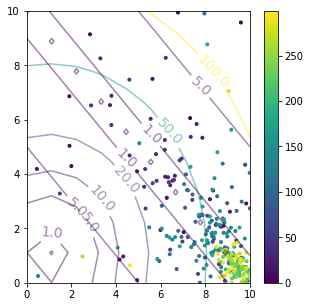

In [187]:
plt.figure(figsize=(5,5))
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)

# plt.scatter(study_cons.trials_dataframe()['params_x1'], study_cons.trials_dataframe()['params_x2'], c=study_cons.trials_dataframe()['value'], marker='.')
plt.scatter(study_cons.trials_dataframe()['params_x1'], study_cons.trials_dataframe()['params_x2'], c=study_cons.trials_dataframe()['number'], marker='.')
plt.colorbar()

In [188]:
study_cons.trials_dataframe().sort_values('value')[study_cons.trials_dataframe().sort_values('value')['user_attrs_constraint']<(0.01,)]

,number,value,datetime_start,datetime_complete,duration,params_x1,params_x2,user_attrs_constraint,system_attrs_constraints,state
76,76,50.796215,2022-08-30 16:36:03.615662,2022-08-30 16:36:03.625195,0 days 00:00:00.009533,8.066444,1.928218,"(0.005338321125854861,)","(0.005338321125854861,)",COMPLETE
285,285,61.225224,2022-08-30 16:36:09.100795,2022-08-30 16:36:09.122975,0 days 00:00:00.022180,8.822635,1.177763,"(0.0003982314386163921,)","(0.0003982314386163921,)",COMPLETE
246,246,66.165958,2022-08-30 16:36:07.944099,2022-08-30 16:36:07.977432,0 days 00:00:00.033333,9.133118,0.864562,"(0.002319326709917746,)","(0.002319326709917746,)",COMPLETE
255,255,66.460297,2022-08-30 16:36:08.229902,2022-08-30 16:36:08.263799,0 days 00:00:00.033897,9.151020,0.854501,"(0.005520521494773334,)","(0.005520521494773334,)",COMPLETE
236,236,70.061826,2022-08-30 16:36:07.599064,2022-08-30 16:36:07.625309,0 days 00:00:00.026245,9.362216,0.632344,"(0.005440392388315729,)","(0.005440392388315729,)",COMPLETE
202,202,73.282780,2022-08-30 16:36:06.613459,2022-08-30 16:36:06.632905,0 days 00:00:00.019446,9.543293,0.456935,"(0.00022777927462591663,)","(0.00022777927462591663,)",COMPLETE
204,204,79.496234,2022-08-30 16:36:06.668433,2022-08-30 16:36:06.694851,0 days 00:00:00.026418,9.872605,0.120735,"(0.006659628034100251,)","(0.006659628034100251,)",COMPLETE


In [189]:
df_cons = study_cons.trials_dataframe().sort_values('value')#[study_cons.trials_dataframe().sort_values('value')['user_attrs_constraint'] < (1, )]

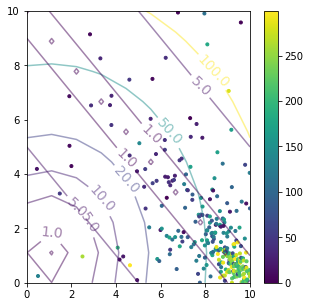

In [190]:
plt.figure(figsize=(5,5))
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)

# plt.plot(df_cons['params_x1'], df_cons['params_x2'], marker='.')
plt.scatter(df_cons['params_x1'], df_cons['params_x2'], c=df_cons['number'], marker='.')
plt.colorbar()
# plt.colorbar()

## try and tell methodで制約付きが使えるか?

In [191]:
from optuna import create_study, create_trial
from optuna.distributions import (
    UniformDistribution,  # A uniform distribution in the linear domain.
    LogUniformDistribution,  # A uniform distribution in the log domain.
    DiscreteUniformDistribution,  # A discretized uniform distribution in the linear domain.
    IntUniformDistribution,  # A uniform distribution on integers.
    IntLogUniformDistribution,  # A uniform distribution on integers in the log domain.
    CategoricalDistribution,  # A categorical distribution.
)

def constraints(trial):
    return trial.user_attrs['constraint']

def suggest_next_samples(samples, n_next_samples=1):
    """_summary_
    Args:
        samples (List[dict]): _description_
        n_next_samples (int, optional): _description_. Defaults to 1.
    Returns:
        _type_: _description_
    Example:
    [
        {'objective_values': {'values_0': 20},
        'params': [{'key': 'p0', 'value': -4.0, 'opttype': 'uniform', 'search_min': -10, 'search_max': 10},
                   {'key': 'p1', 'value': -8.0, 'opttype': 'uniform', 'search_min': -10, 'search_max': 10}]
        },
        {'objective_values': {'values_0': 50},
        'params': [{'key': 'p0', 'value': -2.0, 'opttype': 'uniform', 'search_min': -10, 'search_max': 10},
                   {'key': 'p1', 'value': -8.0, 'opttype': 'uniform', 'search_min': -10, 'search_max': 10}]
        }
    ]
    """
    study, distributions = _regist_samples(samples)

    # calculate next trial params
    suggest_params_list = []
    for _ in range(n_next_samples):
        trial = study.ask(distributions)
        suggest_params_list.append(trial.params)

    return suggest_params_list

def _regist_samples(samples):
    init_sample = samples[0]
    n_objective_value = len(init_sample['objective_values'])
    n_param = len(init_sample['params'])
    distributions = _define_distributions(init_sample)
    study = create_study(directions=['minimize' for _ in range(n_objective_value)], sampler=optuna.samplers.TPESampler(constraints_func=constraints))
    for sample in samples:
        study.add_trial(
            create_trial(
                params=_convert_params_to_dict(sample['params'], n_param),
                distributions=distributions,
                values=_convert_objective_values_dicts_to_lists(sample['objective_values'], n_objective_value),
                user_attrs={'constraint': (obj2(sample['params'][0]['value'], sample['params'][1]['value']),)},
                system_attrs={'constraints': (obj2(sample['params'][0]['value'], sample['params'][1]['value']),)}
            )
        )
    return study, distributions

def _define_distributions(init_sample):
    distributions = {}
    for lis in init_sample['params']:
        if lis['opttype'] == 'uniform':
            """ ValueError : If low value is larger than high value."""
            distributions[lis['key']] = UniformDistribution(low=lis['search_min'], high=lis['search_max'])

        elif lis['opttype'] == 'loguniform':
            """ ValueError : If low value is larger than high value, or low value is smaller than or equal to 0."""
            distributions[lis['key']] = LogUniformDistribution(low=lis['search_min'], high=lis['search_max'])

        elif lis['opttype'] == 'discreteuniform':
            """ ValueError – If low value is larger than high value.  """
            distributions[lis['key']] = DiscreteUniformDistribution(low=lis['search_min'], high=lis['search_max'], q=lis['step'])

        elif lis['opttype'] == 'int':
            """ ValueError : If low value is larger than high value, or step value is smaller or equal to 0. """
            distributions[lis['key']] = IntUniformDistribution(low=lis['search_min'], high=lis['search_max'])

        elif lis['opttype'] == 'intloguniform':
            """ ValueError : If low value is larger than high value, or low value is smaller than 1."""
            distributions[lis['key']] = IntLogUniformDistribution(low=lis['search_min'], high=lis['search_max'])

        elif lis['opttype'] == 'categorical':
            """ ValueError : If choices do not contain any elements. """
            distributions[lis['key']] = CategoricalDistribution(choices=lis['search_keys'])

        else:
            raise ValueError(f"opttype:{lis['opttype']} is invalid distribution type. \n opttype must be one of the following. \n ['uniform', 'loguniform', 'discreteuniform', 'int', 'intloguniform', 'categorical']")

    return distributions


def _convert_objective_values_dicts_to_lists(values: dict[str, float], n_objective_value: int = None):
    """_summary_
    Args:
        values (dict[str, float]): {'values_2': v2, 'values_0': v0, 'values_1': v1}
        n_objective_value (int): Defaults to None.
    Returns:
        _type_: _description_
    """

    if n_objective_value is None:
        n_objective_value = len(values)

    # check_size
    if len(values) != n_objective_value:
        raise ValueError(f"The size of the objective_values is not uniform. Expected size:{n_objective_value}, but got {len(values)}")

    val = [values[f'values_{i}'] for i in range(n_objective_value)]
    return val


def _convert_params_to_dict(params, n_param=None):
    """_summary_
    Args:
        params (_type_): _description_
        n_params (_type_, optional): _description_. Defaults to None.
    Returns:
        _type_: _description_
    """
    if n_param is None:
        n_param = len(params)

    # check_size
    if len(params) != n_param:
        raise ValueError(f"The size of the params is not uniform. Expected size:{n_param}, but got {len(params)}")

    para_dict = {}
    for para in params:
        para_dict[para['key']] = para['value']
    return para_dict

In [192]:
x0 = 4.0
x1 = 5.0
values_0 = obj1(x0, x1)

init_sample = {}
init_sample['objective_values'] = {'values_0': values_0}
init_sample['params'] = [
    {'key':'p0', 'value':x0, 'opttype':'uniform', 'search_min':0, 'search_max':10},
    {'key':'p1', 'value':x1, 'opttype':'uniform', 'search_min':0, 'search_max':10}
]

samples = [init_sample]

In [193]:
for i in range(300):
    next_sample = suggest_next_samples(samples)

    # levi関数へ問い合わせ.
    val = obj1(next_sample[0]['p0'], next_sample[0]['p1'])
    sample = {'objective_values':{'values_0': val},
              'params':[{'key':'p0', 'value':next_sample[0]['p0'], 'opttype':'uniform', 'search_min':0, 'search_max':10},
                        {'key':'p1', 'value':next_sample[0]['p1'], 'opttype':'uniform', 'search_min':0, 'search_max':10}
              ]}
    samples.append(sample)

UniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.distributions.FloatDistribution` instead.
The ``constraints_func`` option is an experimental feature. The interface can change in the future.
[I 2022-08-30 16:36:11,918] A new study created in memory with name: no-name-153184f5-bdc4-45af-9b74-c0455f8be56c
UniformDistribution(high=10.0, low=0.0) is deprecated and internally converted to FloatDistribution(high=10.0, log=False, low=0.0, step=None). See https://github.com/optuna/optuna/issues/2941.
[I 2022-08-30 16:36:11,922] A new study created in memory with name: no-name-14cf625d-bd75-4aab-98c7-359e80a755b4
[I 2022-08-30 16:36:11,928] A new study created in memory with name: no-name-84229c85-2ca7-4229-9102-ee6cba702142
[I 2022-08-30 16:36:11,932] A new study created in memory with name: no-name-be6ceed4-d3f9-47b3-8bdf-d80c40630d6b
[I 2022-08-30 16:36:11,937] A new study 

In [194]:
study ,_ = _regist_samples(samples)

UniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.distributions.FloatDistribution` instead.
[I 2022-08-30 16:36:30,891] A new study created in memory with name: no-name-d9e47c6a-59cd-425e-802e-b8d33ddec916


In [195]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_p0,params_p1,user_attrs_constraint,system_attrs_constraints,state
0,0,25.000000,2022-08-30 16:36:30.893888,2022-08-30 16:36:30.893888,0 days,4.000000,5.000000,"(1.0,)","(1.0,)",COMPLETE
1,1,54.738891,2022-08-30 16:36:30.894249,2022-08-30 16:36:30.894249,0 days,1.446846,8.385067,"(0.16808645311137127,)","(0.16808645311137127,)",COMPLETE
2,2,39.437248,2022-08-30 16:36:30.894598,2022-08-30 16:36:30.894598,0 days,5.093803,5.762145,"(0.8559480177526382,)","(0.8559480177526382,)",COMPLETE
3,3,20.497688,2022-08-30 16:36:30.895050,2022-08-30 16:36:30.895050,0 days,5.525713,1.124957,"(3.349330739348881,)","(3.349330739348881,)",COMPLETE
4,4,23.498256,2022-08-30 16:36:30.895348,2022-08-30 16:36:30.895348,0 days,5.845813,1.127865,"(3.026321456880048,)","(3.026321456880048,)",COMPLETE
...,...,...,...,...,...,...,...,...,...,...
296,296,38.384828,2022-08-30 16:36:31.007442,2022-08-30 16:36:31.007442,0 days,4.742774,5.937253,"(0.6800274154656734,)","(0.6800274154656734,)",COMPLETE
297,297,27.322888,2022-08-30 16:36:31.007591,2022-08-30 16:36:31.007591,0 days,4.255444,5.089618,"(0.6549383274172911,)","(0.6549383274172911,)",COMPLETE
298,298,30.798780,2022-08-30 16:36:31.007770,2022-08-30 16:36:31.007770,0 days,3.855685,5.758555,"(0.38576029245360743,)","(0.38576029245360743,)",COMPLETE
299,299,80.969622,2022-08-30 16:36:31.007915,2022-08-30 16:36:31.007915,0 days,8.198761,6.398839,"(4.597600051444255,)","(4.597600051444255,)",COMPLETE


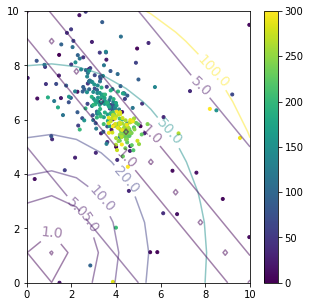

In [196]:
plt.figure(figsize=(5,5))
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)

plt.scatter(study.trials_dataframe()['params_p0'], study.trials_dataframe()['params_p1'], c=study.trials_dataframe()['number'], marker='.')
plt.colorbar()

In [203]:
study.trials_dataframe().sort_values('value')[study.trials_dataframe().sort_values('value')['user_attrs_constraint']< (0.01,)]

,number,value,datetime_start,datetime_complete,duration,params_p0,params_p1,user_attrs_constraint,system_attrs_constraints,state
279,279,33.391792,2022-08-30 16:36:31.003113,2022-08-30 16:36:31.003113,0 days,4.166470,5.833762,"(0.0002325752327116959,)","(0.0002325752327116959,)",COMPLETE
287,287,34.116171,2022-08-30 16:36:31.004457,2022-08-30 16:36:31.004457,0 days,3.950132,6.041120,"(0.008747826993742436,)","(0.008747826993742436,)",COMPLETE
122,122,34.951753,2022-08-30 16:36:30.930121,2022-08-30 16:36:30.930121,0 days,3.772370,6.221658,"(0.0059714128825483215,)","(0.0059714128825483215,)",COMPLETE
199,199,35.081550,2022-08-30 16:36:30.969287,2022-08-30 16:36:30.969287,0 days,3.758452,6.241421,"(0.0001273124181899732,)","(0.0001273124181899732,)",COMPLETE
156,156,38.615228,2022-08-30 16:36:30.944037,2022-08-30 16:36:30.944037,0 days,3.192167,6.814605,"(0.006771895431182173,)","(0.006771895431182173,)",COMPLETE
146,146,40.180641,2022-08-30 16:36:30.938393,2022-08-30 16:36:30.938393,0 days,2.977852,7.022353,"(0.00020582488811449196,)","(0.00020582488811449196,)",COMPLETE
